# Noise image

In [41]:
import sys
sys.path.append('..')

In [42]:
import matplotlib.pyplot
import matplotlib.cm
import matplotlib

matplotlib.rcParams['figure.facecolor'] = '303030'
matplotlib.rcParams['axes.facecolor'] = '303030'
matplotlib.rcParams['text.color'] = 'FFFFFF'
matplotlib.rcParams['xtick.color'] = 'FFFFFF'
matplotlib.rcParams['ytick.color'] = 'FFFFFF'
matplotlib.rcParams['axes.labelcolor'] = 'FFFFFF'

import numpy
import pathlib

In [43]:
import lasp.convert
import lasp.metrics
import lasp.noise
import lasp.io
import lasp.filters

In [44]:
path_results = pathlib.Path('./results')
if not(path_results.exists()):
    path_results.mkdir()

(400, 400)


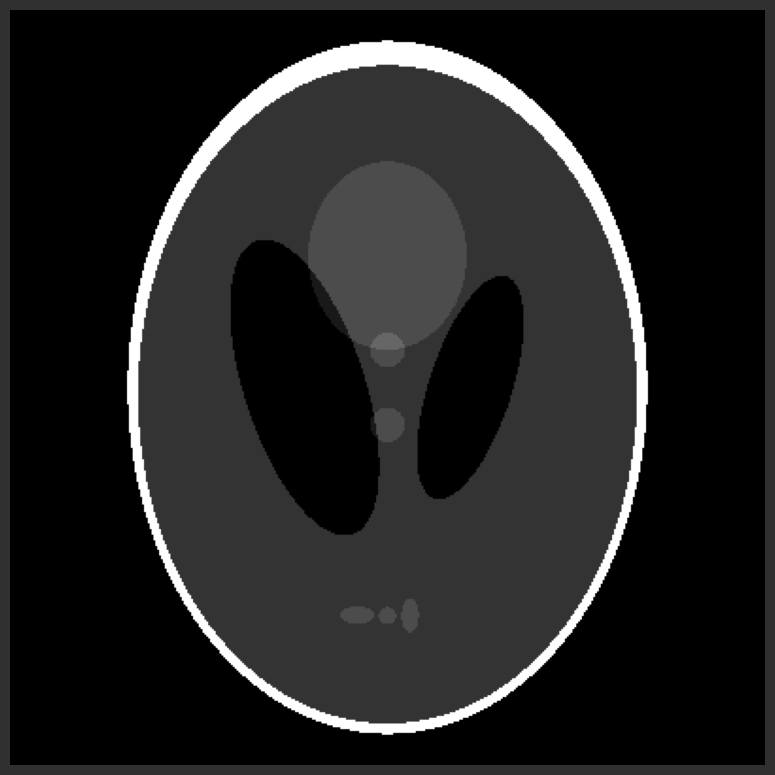

In [45]:
img = lasp.io.read(image_path=pathlib.Path('phantom.npy'))
figure = matplotlib.pyplot.figure(figsize=(10, 10), dpi=100)
matplotlib.pyplot.axis('off')
_ = matplotlib.pyplot.imshow(img, cmap='gray')
print(img.shape)

# matplotlib.pyplot.imsave(path_results / 'orginal.png', )

In [46]:
snr_db = 10
snr = lasp.convert.snrdb_to_snr(snr_db)
img_noised = lasp.noise.additive_white_gaussian_noise(img, snr)
mse = lasp.metrics.mean_squared_error(img, img_noised)
mae = lasp.metrics.mean_absolute_error(img, img_noised)
psnr = lasp.metrics.peak_signal_to_noise_ratio(img, img_noised)  

MAE : 0.0440884326490426
MSE : 0.004282693860921187
PSNR : 23.68282969092689


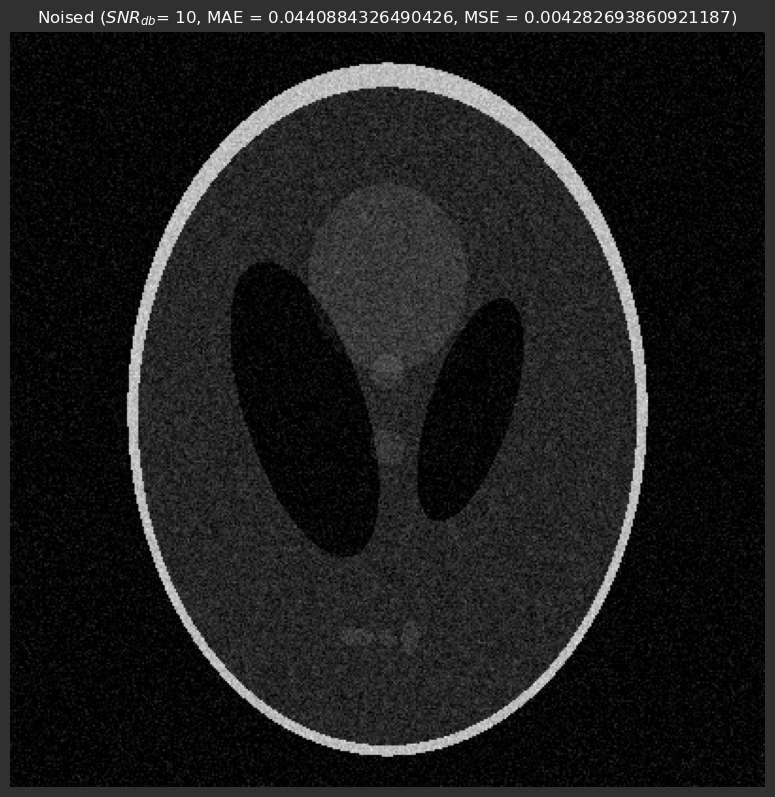

In [47]:
print('MAE :', mae )
print('MSE :', mse)
print('PSNR :', psnr)
figure = matplotlib.pyplot.figure(figsize=(10, 10), dpi=100)
matplotlib.pyplot.axis('off')
matplotlib.pyplot.title('Noised ($SNR_{db}$' + '= {}, MAE = {}, MSE = {})'.format(snr_db, mae, mse))
_ = matplotlib.pyplot.imshow(img_noised, cmap='gray')

In [48]:
with open(path_results / 'original.npy', 'wb') as f:
    numpy.save(f, img)

In [49]:
with open(path_results / 'noised.npy', 'wb') as f:
    numpy.save(f, img_noised)